In [93]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [94]:
dataframe = pd.read_csv("types_stats_data.csv")

dataframe.isna().sum()

type1           0
type2         384
hp              0
attack          0
defense         0
speed           0
sp_attack       0
sp_defense      0
dtype: int64

To better fit the data into a Logistic Regression Model, we're going to combine the type1 and type2 columsn by adding a duplicate entry for any pokemon with doouble types except with their secondary type as their primary. This also gives about another 400 data points to work with, and should slightly boost the models effectivenss.

In [95]:
double_type_dataframe = dataframe.dropna()

for index, row in double_type_dataframe.iterrows():
    if type(row["type2"]) == float: continue
   
    dataframe.loc[dataframe.shape[0] + 1] = [row["type2"], pd.NA, row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"]]

dataframe.tail()

,type1,type2,hp,attack,defense,speed,sp_attack,sp_defense
1214,fighting,NaN,71,137,37,151,137,37
1215,flying,NaN,97,101,103,61,107,101
1216,steel,NaN,59,181,131,109,59,31
1217,dragon,NaN,223,101,53,43,97,53
1218,fairy,NaN,80,95,115,65,130,115


In [96]:
x = dataframe[["hp","defense","attack","speed","sp_defense","sp_attack"]]
y = dataframe["type1"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

With Precision, Accuracy, and Recall scores all around the 0.15 mark it's clear that there is very little correlation between the stats and the types of the pokemon. The heatmap of the cofusion matrix shows that while some types are sliightly more likely to be predicted correctly, generally types are precicted incorrectly and almost at random.

Precision: 0.150097636547162
Accuracy: 0.1598360655737705
Recall: 0.1598360655737705
F1 Score: 0.13522064279357457


/home/elfy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

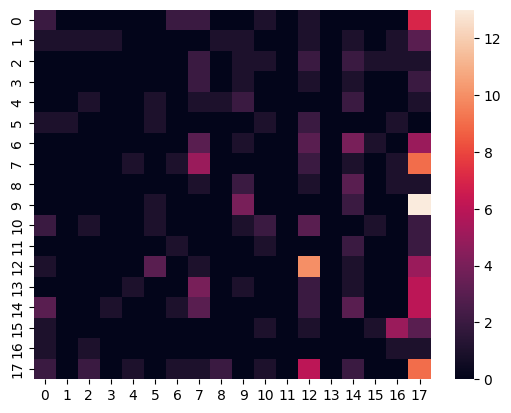

In [97]:
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(x_train,y_train)


y_pred = log_reg_model.predict(x_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
precision_score = precision_score(y_test, y_pred, average='weighted')
accuracy_score = accuracy_score(y_test, y_pred)
recall_score = recall_score (y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision_score}\nAccuracy: {accuracy_score}\nRecall: {recall_score}\nF1 Score: {f1_score}")
sns.heatmap(confusion_matrix)